<a href="https://colab.research.google.com/github/crismaque/Se-nales_y_Sistemas_2023_II/blob/main/PARCIAL1_%20SYS/PARCIAL_1_SE%C3%91ALES_Y_SISTEMAS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un microprocesador de 3 bits con
entrada analoga de -5 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalizacion para la señal: $x(t) = 7 sin(4t−π/2) − 2 cos(5t) + 2 cos(10t)$. Presente las simulaciones
y graficas de los procedimientos más representativos en un
cuaderno de Python, incluyendo al menos dos periodos de la
senal estudiada.

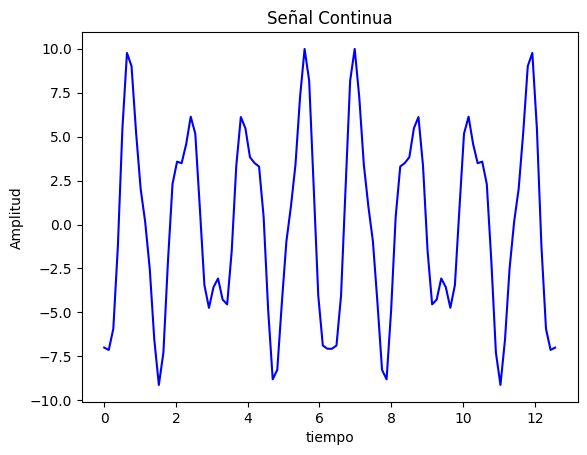

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


To = 2*np.pi
F = 1/To
A = 10
#definimos las frecuencias
omega1=4
omega2=5
omega3=10
#defino la frecuencia y periodo de muestreo
Fs = F*35 # cumple nyquist
Ts= 1/Fs

#defino un vector tiempo para 2 periodos de la señal y la función
tv = np.linspace(0,2*To,100)
x = 7*np.sin(omega1*tv-np.pi/2)-2*np.cos(omega2*tv)+2*np.cos(omega3*tv)

plt.plot(tv,x,'b')
plt.title('Señal Continua')
plt.ylabel('Amplitud')
plt.xlabel('tiempo')
plt.show()

<ipython-input-53-8a66edb63afb>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(td,yd, use_line_collection=True )


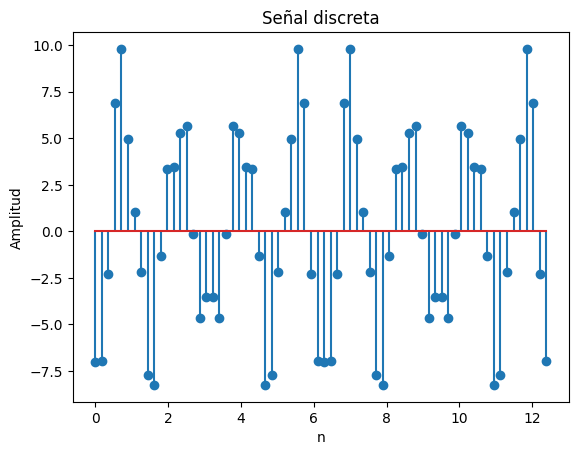

In [53]:
#para el tiempo discreto defino un vector para n que me haga el muestreo segun el periodo que defini
# para 2 periodos de la señal original
td = np.arange(0,2*To,Ts)
yd = 7*np.sin(omega1*td-np.pi/2)-2*np.cos(omega2*td)+2*np.cos(omega3*td)

plt.stem(td,yd, use_line_collection=True )
plt.title('Señal discreta')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.show()

<ipython-input-54-dc0a21e247f2>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(td,yv,use_line_collection=True)


Text(0.5, 0, 'n')

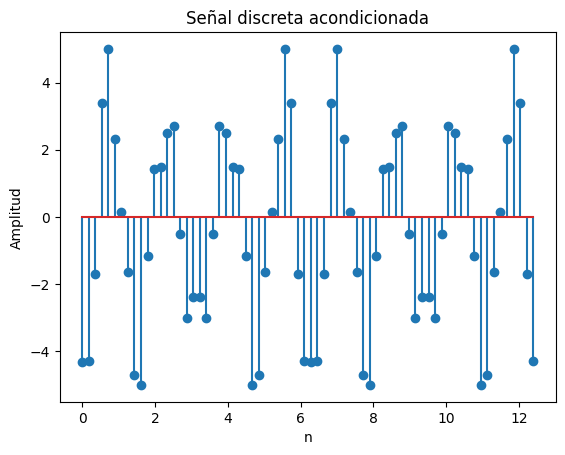

In [54]:
#para una entrada analoga de -5v a 5v cambio los limites de amplitud con el cero y pendiete
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

yv = my_ceropen(yd,ymin=-5,ymax=5)

plt.stem(td,yv,use_line_collection=True)
plt.title('Señal discreta acondicionada')
plt.ylabel('Amplitud')
plt.xlabel('n')

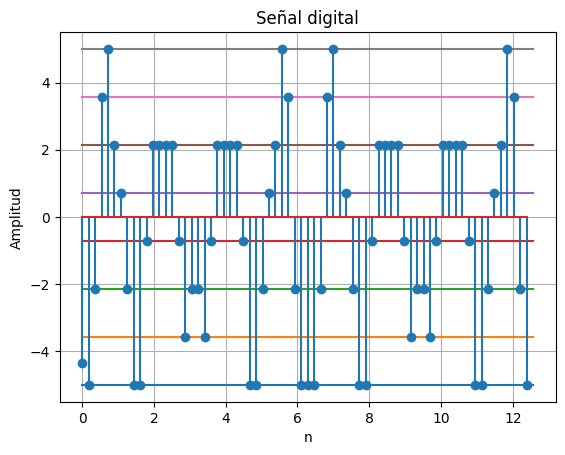

In [55]:
#con son 3 bits la amplitud de la señal tiene 8 estados
#con la función definida le doy a los valores de amplitud el estado mas cercano
def digital_conv(bits: int, ymin: int, ymax: int, y: any):
    states = np.linspace(ymin, ymax, 2**bits)
    d = cdist(y.reshape(-1, 1), states.reshape(-1, 1))
    ind = np.argmin(d, axis=1)
    return states[ind]

inmin = -5
inmax = 5

yv = my_ceropen(yd,ymin=-5,ymax=5)

for i in range(yv.shape[0]):
    if i == 0:
        ydgt = digital_conv(4, inmin, inmax, yv[i])
    else:
        ydgt = np.append(ydgt, digital_conv(3, inmin, inmax, yv[i]))

for v in np.linspace(inmin, inmax, 2**3):
    plt.plot(tv, v*np.ones(len(tv)))

plt.stem(td, ydgt)
plt.title('Señal digital')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.grid()
plt.show()